In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs
import pandas as pd
from matplotlib import rc
import matplotlib as mpl
import scipy.optimize as opt
rc('text', usetex=True)
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIX"
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["legend.borderpad"] = 0.15
mpl.rcParams["font.size"] = 8

In [2]:
def dominant_eigval(L):
    L_sparse = L.data_as('csr_matrix')
    eval = eigs(L_sparse, k=1, which='LR', return_eigenvectors=False, ncv = 100, tol=1e-8)
    return np.real(eval[0])

In [3]:
# check the CGF for the single system
# system parameters

N=30

phi0 = 0
omega_c = N/2
beta = 0.5
omega = beta * omega_c
ds = 10**(-4)
ddphi = 10**(-4)

    # Collective spin operators 

S_x = jmat(N/2, 'x')
S_y = jmat(N/2, 'y')
S_z = jmat(N/2, 'z')
S_p = jmat(N/2, '+')
S_m = jmat(N/2, '-')
idenJ = qeye(S_z.shape[0])
def deformed_L(omega, ddphi, phi0):
    H = omega*S_x
    HT = (H.dag()).conj()
    SpSmT = ((S_p*S_m).dag()).conj()
    Lphi = (-1j*(tensor(idenJ, H)-tensor(HT, idenJ))+tensor(S_m.conj(), S_m) 
    -0.5*tensor(idenJ, S_p*S_m)-0.5*tensor(SpSmT, idenJ)
    +(np.exp(-1j*(phi0+ddphi))-1)*tensor(S_m.conj(), S_m))
    return Lphi

def CGF1(dphi, omega, ddphi):
    return (np.cos(dphi+ddphi)-1)*omega**2

lambdas = np.array([])

for dphi in np.arange(-1, 1.1, 0.1):
    LM = deformed_L(omega, 0, dphi)
    lambdas = np.append(lambdas, dominant_eigval(LM))

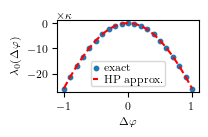

In [4]:
fig , (ax1) = plt.subplots(1,1,figsize=(0.6*3.54331,0.4*3.54331), width_ratios=[1], layout='tight')
ax1.scatter(np.arange(-1, 1.1, 0.1), lambdas, label='exact', s=10)
ax1.plot(np.arange(-1, 1.02, 0.02), CGF1(np.arange(-1, 1.02, 0.02), omega, 0), 'r--',label='HP approx.')
ax1.legend(handletextpad=0.5,handlelength=0.5, labelspacing=0.2)
ax1.set_xlabel(r'$\Delta \varphi$')
ax1.set_ylabel(r'$\lambda_0 (\Delta\varphi)$')
ax1.text(0,1.01,r'$\times\kappa$',transform=ax1.transAxes, ha='left', va='bottom')
fig.savefig('cgf_qfi.pdf', dpi=1000)
plt.show()